In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set up views
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', 1000)


In [82]:
sales_set = pd.read_csv("sales_data.xls")
sales_set.head()

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status,location
0,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,4,3201,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
1,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,5,3202,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,4,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
2,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,9,3203,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,5,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
3,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,12,3204,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,1,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
4,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,6,3205,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success,Saint Helena


In [83]:
sales_set.info()
sales_set.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578320 entries, 0 to 578319
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   customer_id      578320 non-null  object
 1   device_id        578320 non-null  object
 2   item_id          578320 non-null  int64 
 3   line_item_id     578320 non-null  int64 
 4   order_id         578320 non-null  object
 5   event_id         578320 non-null  int64 
 6   event_timestamp  578320 non-null  object
 7   quantity         578320 non-null  int64 
 8   currency         578320 non-null  object
 9   checked_out_at   578320 non-null  object
 10  status           578320 non-null  object
 11  location         578320 non-null  object
dtypes: int64(4), object(8)
memory usage: 52.9+ MB


,item_id,line_item_id,event_id,quantity
count,578320.000000,578320.000000,578320.000000,578320.000000
mean,7.995741,19034.444880,88235.379821,3.009861
std,4.322902,9153.541683,42541.874688,1.406914
min,1.000000,3201.000000,14786.000000,1.000000
25%,4.000000,11108.000000,51318.000000,2.000000
50%,8.000000,19067.000000,88373.000000,3.000000
75%,12.000000,26960.000000,125003.000000,4.000000
max,15.000000,34941.000000,161960.000000,5.000000


In [84]:
# Check for empty cells
sales_set.isna().sum()
sales_set.isnull().sum()

customer_id        0
device_id          0
item_id            0
line_item_id       0
order_id           0
event_id           0
event_timestamp    0
quantity           0
currency           0
checked_out_at     0
status             0
location           0
dtype: int64

In [85]:
sales_set.shape

(578320, 12)

In [86]:
# Using Loc
sales_set.loc[[1,4,6,7]] #This works with both integers and strings

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status,location
1,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,5,3202,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,4,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
4,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,6,3205,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
6,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,4,3201,9e950ce3-2e12-479c-a051-493c1a497d49,14787,2024-03-27 07:14:33.987347,2,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
7,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,5,3202,9e950ce3-2e12-479c-a051-493c1a497d49,14787,2024-03-27 07:14:33.987347,4,NGN,2024-03-30 04:19:10.406794,success,Saint Helena


In [87]:
# Using iloc
sales_set.iloc[[1,4,6,7]] #Weorks with only integers

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status,location
1,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,5,3202,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,4,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
4,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,6,3205,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
6,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,4,3201,9e950ce3-2e12-479c-a051-493c1a497d49,14787,2024-03-27 07:14:33.987347,2,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
7,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,5,3202,9e950ce3-2e12-479c-a051-493c1a497d49,14787,2024-03-27 07:14:33.987347,4,NGN,2024-03-30 04:19:10.406794,success,Saint Helena


In [88]:
sales_set.loc[[1,4,6,7],['device_id','item_id','order_id']]

,device_id,item_id,order_id
1,33b485de-7338-4997-b1d0-b988ba17b245,5,9e950ce3-2e12-479c-a051-493c1a497d49
4,33b485de-7338-4997-b1d0-b988ba17b245,6,9e950ce3-2e12-479c-a051-493c1a497d49
6,33b485de-7338-4997-b1d0-b988ba17b245,4,9e950ce3-2e12-479c-a051-493c1a497d49
7,33b485de-7338-4997-b1d0-b988ba17b245,5,9e950ce3-2e12-479c-a051-493c1a497d49


In [89]:
sales_set.iloc[[1,4,6,7], [0,2,4]]

,customer_id,item_id,order_id
1,cda7bec0-7cbf-4145-baf9-e049bab94504,5,9e950ce3-2e12-479c-a051-493c1a497d49
4,cda7bec0-7cbf-4145-baf9-e049bab94504,6,9e950ce3-2e12-479c-a051-493c1a497d49
6,cda7bec0-7cbf-4145-baf9-e049bab94504,4,9e950ce3-2e12-479c-a051-493c1a497d49
7,cda7bec0-7cbf-4145-baf9-e049bab94504,5,9e950ce3-2e12-479c-a051-493c1a497d49


In [90]:
# Slicing using loc and iloc
sales_set.iloc[::]
sales_set.iloc[:]
sales_set.iloc[0:-1] #All of these gives the same output in slicing  returninng all of the rows..

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status,location
0,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,4,3201,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
1,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,5,3202,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,4,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
2,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,9,3203,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,5,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
3,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,12,3204,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,1,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
4,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,6,3205,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
...,...,...,...,...,...,...,...,...,...,...,...,...
578314,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,4,34940,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161958,2024-03-30 04:03:18.224196,3,USD,2024-03-30 04:14:18.224200,failed,Christmas Island
578315,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161958,2024-03-30 04:03:18.224196,3,USD,2024-03-30 04:14:18.224200,failed,Christmas Island
578316,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,4,34940,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161959,2024-03-30 04:03:18.224198,3,USD,2024-03-30 04:14:18.224200,failed,Christmas Island
578317,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161959,2024-03-30 04:03:18.224198,3,USD,2024-03-30 04:14:18.224200,failed,Christmas Island


In [91]:
# Using loc ...
sales_set.loc[:] 
sales_set.loc[::] 
sales_set.loc[-1:] 

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status,location
0,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,4,3201,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
1,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,5,3202,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,4,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
2,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,9,3203,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,5,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
3,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,12,3204,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,1,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
4,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,6,3205,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
...,...,...,...,...,...,...,...,...,...,...,...,...
578315,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161958,2024-03-30 04:03:18.224196,3,USD,2024-03-30 04:14:18.224200,failed,Christmas Island
578316,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,4,34940,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161959,2024-03-30 04:03:18.224198,3,USD,2024-03-30 04:14:18.224200,failed,Christmas Island
578317,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161959,2024-03-30 04:03:18.224198,3,USD,2024-03-30 04:14:18.224200,failed,Christmas Island
578318,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,4,34940,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161960,2024-03-30 04:14:18.224200,3,USD,2024-03-30 04:14:18.224200,failed,Christmas Island


In [92]:
# Using loc and iloc to slice columns
sales_set.loc[0:4,'customer_id':'item_id']  # Pick from row 0 to 4, and column 1 to 3...

,customer_id,device_id,item_id
0,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,4
1,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,5
2,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,9
3,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,12
4,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,6


In [93]:
# Using iloc for integer or index numbers
sales_set.iloc[0:4,0:4]

,customer_id,device_id,item_id,line_item_id
0,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,4,3201
1,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,5,3202
2,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,9,3203
3,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,12,3204


In [94]:
sales_set.iloc[0:-1,1:4]

,device_id,item_id,line_item_id
0,33b485de-7338-4997-b1d0-b988ba17b245,4,3201
1,33b485de-7338-4997-b1d0-b988ba17b245,5,3202
2,33b485de-7338-4997-b1d0-b988ba17b245,9,3203
3,33b485de-7338-4997-b1d0-b988ba17b245,12,3204
4,33b485de-7338-4997-b1d0-b988ba17b245,6,3205
...,...,...,...
578314,74bb4936-9890-421b-a62a-ee544191fa1e,4,34940
578315,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941
578316,74bb4936-9890-421b-a62a-ee544191fa1e,4,34940
578317,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941


In [4]:
# lets work with index ..... using loc and iloc...
sales_set = pd.read_csv("sales_data.xls")
sales_set.set_index("location", inplace=True)

In [5]:
sales_set.head(5)

sales_set.index

Index(['Saint Helena', 'Saint Helena', 'Saint Helena', 'Saint Helena',
       'Saint Helena', 'Saint Helena', 'Saint Helena', 'Saint Helena',
       'Saint Helena', 'Saint Helena',
       ...
       'Christmas Island', 'Christmas Island', 'Christmas Island',
       'Christmas Island', 'Christmas Island', 'Christmas Island',
       'Christmas Island', 'Christmas Island', 'Christmas Island',
       'Christmas Island'],
      dtype='object', name='location', length=578320)

In [6]:
# list af all the locations or countries where all the customers purchase from...
unique_index = sales_set.index.unique().sort_values()
unique_index

Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antarctica (the territory South of 60 deg S)',
       'Antigua and Barbuda', 'Argentina',
       ...
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam',
       'Wallis and Futuna', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='location', length=243)

In [8]:
# top 10 countries or locations where most patronage are recieved...
sales_set.index.value_counts().head(10)

location
Korea            6997
Argentina        4507
Mauritius        4414
Jersey           4130
Panama           3936
French Guiana    3851
Guernsey         3804
Guatemala        3731
Albania          3721
Philippines      3675
Name: count, dtype: int64

<Axes: xlabel='location'>

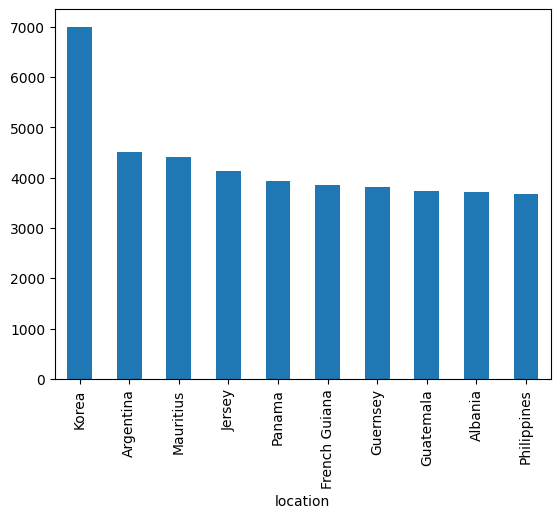

In [9]:
sales_set.index.value_counts().head(10).plot(kind="bar")

<Axes: xlabel='location'>

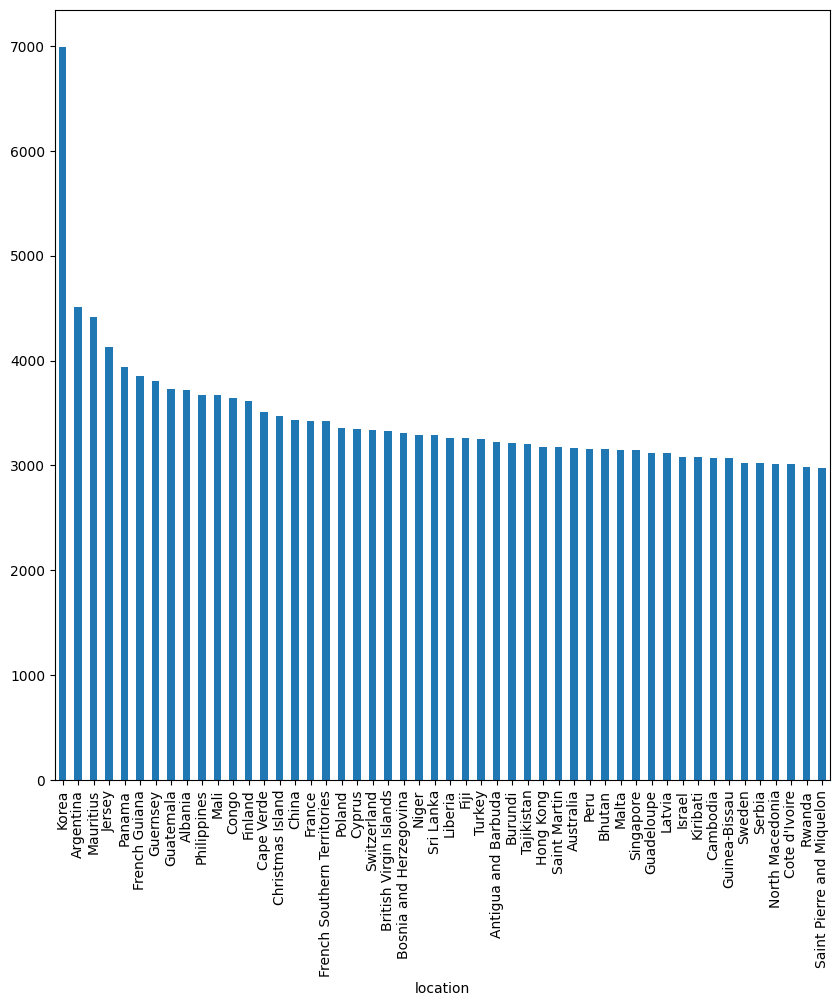

In [19]:
# top 100 countries or locations where most patronage are recieved...
sales_set.index.value_counts().head(50).plot(kind='bar', figsize=(10,10))

In [11]:
unique_index.nunique()

243

In [16]:
sales_set.columns

Index(['customer_id', 'device_id', 'item_id', 'line_item_id', 'order_id',
       'event_id', 'event_timestamp', 'quantity', 'currency', 'checked_out_at',
       'status'],
      dtype='object')

In [20]:
len(sales_set.columns)

11

In [23]:
sales_set.loc["Nigeria"]

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Nigeria,916401c0-8d4c-40b3-91d3-2adf0d6d814f,938a10df-513f-49f9-99a6-668c96b503ef,13,7316,b760345e-68d8-47e7-86db-23787c55056f,33989,2024-03-30 04:03:11.448971,5,USD,2024-03-30 04:11:11.449022,success
Nigeria,916401c0-8d4c-40b3-91d3-2adf0d6d814f,938a10df-513f-49f9-99a6-668c96b503ef,6,7317,b760345e-68d8-47e7-86db-23787c55056f,33989,2024-03-30 04:03:11.448971,2,USD,2024-03-30 04:11:11.449022,success
Nigeria,916401c0-8d4c-40b3-91d3-2adf0d6d814f,938a10df-513f-49f9-99a6-668c96b503ef,13,7316,b760345e-68d8-47e7-86db-23787c55056f,33990,2024-03-30 04:03:11.449017,5,USD,2024-03-30 04:11:11.449022,success
Nigeria,916401c0-8d4c-40b3-91d3-2adf0d6d814f,938a10df-513f-49f9-99a6-668c96b503ef,6,7317,b760345e-68d8-47e7-86db-23787c55056f,33990,2024-03-30 04:03:11.449017,2,USD,2024-03-30 04:11:11.449022,success
Nigeria,916401c0-8d4c-40b3-91d3-2adf0d6d814f,938a10df-513f-49f9-99a6-668c96b503ef,13,7316,b760345e-68d8-47e7-86db-23787c55056f,33991,2024-03-30 04:03:11.449020,5,USD,2024-03-30 04:11:11.449022,success
...,...,...,...,...,...,...,...,...,...,...,...
Nigeria,8aabfc1a-4395-4e8b-82b4-6e8cc2b07586,5843c4cf-75c8-4f99-a6ec-e0392cd5bb23,1,32696,9428b052-c011-4a1e-9dc4-48307aed5c8b,151799,2024-03-30 04:10:17.599412,3,GBP,2024-03-30 04:10:17.599412,success
Nigeria,8aabfc1a-4395-4e8b-82b4-6e8cc2b07586,5843c4cf-75c8-4f99-a6ec-e0392cd5bb23,3,32697,9428b052-c011-4a1e-9dc4-48307aed5c8b,151799,2024-03-30 04:10:17.599412,3,GBP,2024-03-30 04:10:17.599412,success
Nigeria,8aabfc1a-4395-4e8b-82b4-6e8cc2b07586,5843c4cf-75c8-4f99-a6ec-e0392cd5bb23,4,32698,9428b052-c011-4a1e-9dc4-48307aed5c8b,151799,2024-03-30 04:10:17.599412,5,GBP,2024-03-30 04:10:17.599412,success


In [38]:
sales_set.iloc[0:3]

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,4,3201,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,5,3202,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,4,NGN,2024-03-30 04:19:10.406794,success
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,9,3203,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,5,NGN,2024-03-30 04:19:10.406794,success


In [ ]:
# Filtering/ Masking...
# Using Booleans "AND" & "OR"
# AND in pandas is written as "&"
# OR in pandas is written as "|"

In [39]:
# Filtering
sales_set[sales_set['customer_id'] == "56d7d069-2f58-4b35-9559-9405c45cae33"]

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Brazil,56d7d069-2f58-4b35-9559-9405c45cae33,1857461e-852f-4c95-a412-bbc665f69dbd,3,8229,7304d0f7-3f11-4261-851d-9b5238768976,38122,2024-03-25 03:22:27.265634,5,NGN,2024-03-30 04:07:11.699402,success
Brazil,56d7d069-2f58-4b35-9559-9405c45cae33,1857461e-852f-4c95-a412-bbc665f69dbd,4,8230,7304d0f7-3f11-4261-851d-9b5238768976,38122,2024-03-25 03:22:27.265634,3,NGN,2024-03-30 04:07:11.699402,success
Brazil,56d7d069-2f58-4b35-9559-9405c45cae33,1857461e-852f-4c95-a412-bbc665f69dbd,15,8231,7304d0f7-3f11-4261-851d-9b5238768976,38122,2024-03-25 03:22:27.265634,3,NGN,2024-03-30 04:07:11.699402,success
Brazil,56d7d069-2f58-4b35-9559-9405c45cae33,1857461e-852f-4c95-a412-bbc665f69dbd,2,8232,7304d0f7-3f11-4261-851d-9b5238768976,38122,2024-03-25 03:22:27.265634,5,NGN,2024-03-30 04:07:11.699402,success
Brazil,56d7d069-2f58-4b35-9559-9405c45cae33,1857461e-852f-4c95-a412-bbc665f69dbd,7,8233,7304d0f7-3f11-4261-851d-9b5238768976,38122,2024-03-25 03:22:27.265634,4,NGN,2024-03-30 04:07:11.699402,success
...,...,...,...,...,...,...,...,...,...,...,...
Brazil,56d7d069-2f58-4b35-9559-9405c45cae33,1857461e-852f-4c95-a412-bbc665f69dbd,5,8235,7304d0f7-3f11-4261-851d-9b5238768976,38149,2024-03-30 04:07:11.699402,3,NGN,2024-03-30 04:07:11.699402,success
Brazil,56d7d069-2f58-4b35-9559-9405c45cae33,1857461e-852f-4c95-a412-bbc665f69dbd,1,8236,7304d0f7-3f11-4261-851d-9b5238768976,38149,2024-03-30 04:07:11.699402,3,NGN,2024-03-30 04:07:11.699402,success
Brazil,56d7d069-2f58-4b35-9559-9405c45cae33,1857461e-852f-4c95-a412-bbc665f69dbd,12,8237,7304d0f7-3f11-4261-851d-9b5238768976,38149,2024-03-30 04:07:11.699402,1,NGN,2024-03-30 04:07:11.699402,success


In [42]:
# Total numbers of customers
sales_set["customer_id"].nunique()

4594

<Axes: xlabel='customer_id'>

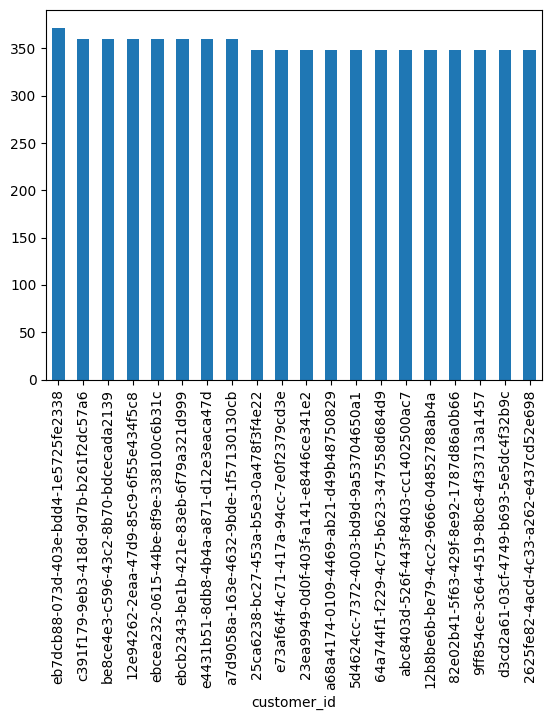

In [ ]:
# Top 20 customers with the highest purchases....
sales_set["customer_id"].value_counts().sort_values(ascending=False).head(20).plot(kind="bar")

In [44]:
# Checking behaviour of customers
mask = (sales_set["customer_id"] == "ebcb2343-be1b-421e-83eb-6f79a321d999")

In [45]:
sales_set[mask].head()

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Wallis and Futuna,ebcb2343-be1b-421e-83eb-6f79a321d999,aa3a57b3-6636-4b91-8fa8-56b0524de6c2,5,26108,5984596b-0ed5-4571-8e79-b261e6f138ad,121373,2024-03-27 12:43:53.991103,5,NGN,2024-03-30 04:14:16.072620,success
Wallis and Futuna,ebcb2343-be1b-421e-83eb-6f79a321d999,aa3a57b3-6636-4b91-8fa8-56b0524de6c2,11,26109,5984596b-0ed5-4571-8e79-b261e6f138ad,121373,2024-03-27 12:43:53.991103,1,NGN,2024-03-30 04:14:16.072620,success
Wallis and Futuna,ebcb2343-be1b-421e-83eb-6f79a321d999,aa3a57b3-6636-4b91-8fa8-56b0524de6c2,4,26110,5984596b-0ed5-4571-8e79-b261e6f138ad,121373,2024-03-27 12:43:53.991103,2,NGN,2024-03-30 04:14:16.072620,success
Wallis and Futuna,ebcb2343-be1b-421e-83eb-6f79a321d999,aa3a57b3-6636-4b91-8fa8-56b0524de6c2,9,26111,5984596b-0ed5-4571-8e79-b261e6f138ad,121373,2024-03-27 12:43:53.991103,5,NGN,2024-03-30 04:14:16.072620,success
Wallis and Futuna,ebcb2343-be1b-421e-83eb-6f79a321d999,aa3a57b3-6636-4b91-8fa8-56b0524de6c2,2,26112,5984596b-0ed5-4571-8e79-b261e6f138ad,121373,2024-03-27 12:43:53.991103,1,NGN,2024-03-30 04:14:16.072620,success


In [48]:
sales_set.loc[mask].head(2)

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Wallis and Futuna,ebcb2343-be1b-421e-83eb-6f79a321d999,aa3a57b3-6636-4b91-8fa8-56b0524de6c2,5,26108,5984596b-0ed5-4571-8e79-b261e6f138ad,121373,2024-03-27 12:43:53.991103,5,NGN,2024-03-30 04:14:16.072620,success
Wallis and Futuna,ebcb2343-be1b-421e-83eb-6f79a321d999,aa3a57b3-6636-4b91-8fa8-56b0524de6c2,11,26109,5984596b-0ed5-4571-8e79-b261e6f138ad,121373,2024-03-27 12:43:53.991103,1,NGN,2024-03-30 04:14:16.072620,success


In [ ]:
sales_set.loc[mask,"customer_id":"currency"].head(2)  # give me mask , but from colunm customer_id to currency

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency
location,,,,,,,,,
Wallis and Futuna,ebcb2343-be1b-421e-83eb-6f79a321d999,aa3a57b3-6636-4b91-8fa8-56b0524de6c2,5,26108,5984596b-0ed5-4571-8e79-b261e6f138ad,121373,2024-03-27 12:43:53.991103,5,NGN
Wallis and Futuna,ebcb2343-be1b-421e-83eb-6f79a321d999,aa3a57b3-6636-4b91-8fa8-56b0524de6c2,11,26109,5984596b-0ed5-4571-8e79-b261e6f138ad,121373,2024-03-27 12:43:53.991103,1,NGN


In [ ]:
sales_set["currency"].unique()